# Survivorship Bias in Multiplicative Wealth Dynamics

## 1. Conceptual Motivation

Trong hệ tăng trưởng nhân (multiplicative systems),
một số quỹ đạo sẽ sụp đổ do biến động âm đủ lớn.

Nếu ta chỉ quan sát các quỹ đạo còn sống sót,
ta có thể đánh giá quá cao hiệu suất trung bình.

Câu hỏi trung tâm:

> Mức độ sai lệch giữa toàn bộ hệ thống và các survivor là bao nhiêu?

Ta sẽ mô phỏng một quá trình wealth động
với absorbing boundary (bankruptcy).

In [1]:
import pandas as pd
import seaborn as sns

from src import (
    simulate_wealth_paths,
    summarize_survivorship,
    plot_sample_wealth_paths,
    plot_final_wealth_distribution
)

sns.set_theme(style="whitegrid")
pd.set_option("display.precision", 4)

## 2. Wealth Process Setup

Ta mô phỏng:

$$W_{t+1} = W_t * e ^ {μ − 0.5σ² + σ Z_t}$$

Bankruptcy xảy ra nếu wealth < threshold.

In [2]:
df = simulate_wealth_paths(
    n_paths=2000,
    periods=50,
    mu=0.05,
    sigma=0.3,
    initial_wealth=1.0,
    bankruptcy_threshold=0.1,
    seed=42
)

df.head()

,path,time,wealth,alive
0,0,0,1.1012,True
1,0,1,1.3862,True
2,0,2,0.7759,True
3,0,3,0.8103,True
4,0,4,0.8102,True


## 3. Path-Level Dispersion

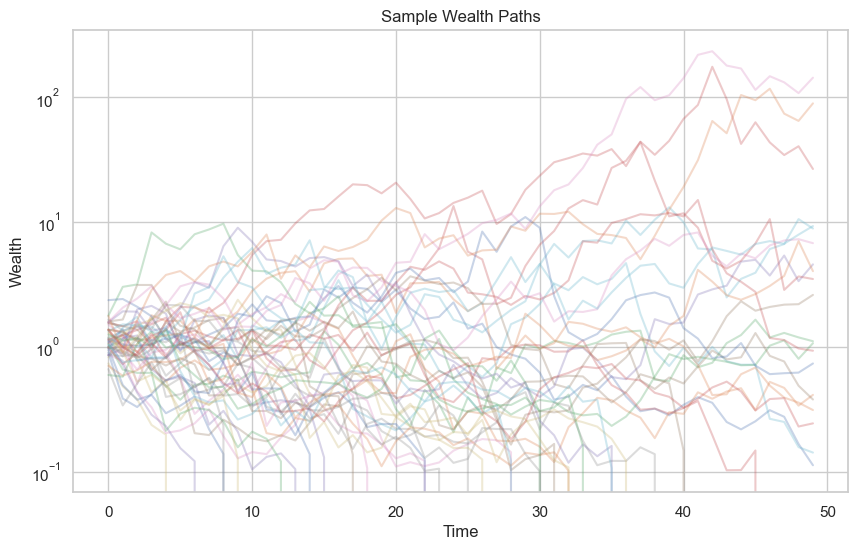

In [3]:
plot_sample_wealth_paths(df, n_paths=50)

## Path-Level Dynamics with Extinction (Log Scale)

Biểu đồ hiển thị 50 quỹ đạo wealth trên thang log trong hệ có absorbing boundary.

### 1. Phân kỳ mạnh theo thời gian

Tất cả path bắt đầu tại wealth = 1.

Theo thời gian:

- Một số path tăng trưởng vượt trội.
- Nhiều path suy giảm dần và chạm ngưỡng phá sản.
- Sau khi chạm ngưỡng, wealth bị giữ ở 0 (absorbing state).

Sự phân tán tăng theo thời gian — đặc trưng của hệ tăng trưởng nhân với biến động cao.

---

### 2. Extinction là hiện tượng phổ biến

Quan sát thấy nhiều đường đi giảm dần xuống ngưỡng thấp và biến mất.

Điều này phản ánh:

- Volatility đủ lớn để tạo drawdown sâu.
- Path quality quyết định khả năng sống sót.
- Survival không còn là hiện tượng hiếm.

Với survival rate ≈ 48%,
phá sản là kết cục phổ biến hơn tăng trưởng mạnh.

---

### 3. Bất cân xứng cấu trúc

Một số ít path đạt wealth rất cao (tail phải mạnh).

Trong khi đó:

- Hơn một nửa path kết thúc tại 0.
- Median wealth cuối kỳ bằng 0.

Điều này cho thấy:

> Typical path không phải là path tăng trưởng.
> Typical path là path phá sản.

---

### 4. Điều kiện hình thành Survivorship Bias

Sự phân kỳ này tạo ra hai nhóm rõ ràng:

- Nhóm chết (wealth = 0)
- Nhóm sống sót với wealth trung bình cao

Nếu chỉ quan sát nhóm sống sót:

- Ta sẽ thấy wealth trung bình ≈ 5.67
- Trong khi mean toàn hệ ≈ 2.73

Sự khác biệt này xuất phát từ extinction dynamics,
không phải do lỗi thống kê.

## 4. Final Wealth Distribution

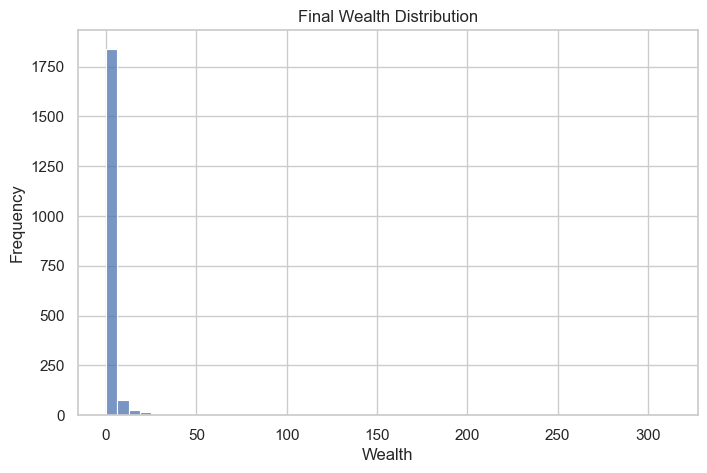

In [4]:
plot_final_wealth_distribution(df)

## Final Wealth Distribution with Extinction

Phân phối wealth cuối kỳ cho thấy cấu trúc cực kỳ lệch phải và phân cực rõ rệt.

### 1. Khối lượng xác suất tập trung tại 0

Cột cao nhất nằm tại wealth = 0.

Điều này phản ánh:

- Hơn một nửa các quỹ đạo đã phá sản.
- Median wealth = 0.
- Phá sản là kết cục phổ biến nhất.

---

### 2. Tail phải dài và mỏng

Một số ít quỹ đạo đạt wealth rất cao (có thể lên tới hàng chục hoặc hàng trăm).

Những path này:

- Có xác suất nhỏ.
- Nhưng có giá trị rất lớn.
- Chi phối mean của toàn bộ hệ thống.

---

### 3. Cấu trúc phân cực (polarized distribution)

Phân phối không chỉ lệch phải,
mà còn có dạng gần như hai chế độ:

- Mass lớn tại 0 (extinction cluster).
- Tail dài ở phía dương (successful survivors).

Không có "trung tâm ổn định".

---

### 4. Nguồn gốc của Survivorship Bias

Khi chỉ giữ lại các path còn sống:

- Ta loại bỏ toàn bộ khối lượng tại 0.
- Phân phối trở thành tail-dominated.

Khi đó:

$$ E[W | S=1] ≫ E[W] $$

Trong cấu hình này:

- Full mean ≈ 2.73
- Survivor mean ≈ 5.67

Bias không xuất phát từ nhiễu thống kê,
mà từ việc condition lên survival event.

---

### 5. Ý nghĩa sâu hơn

Phân phối này cho thấy:

- Ensemble average bị chi phối bởi một số ít quỹ đạo rất thành công.
- Typical path (median) không tăng trưởng.
- Survival là điều kiện cần để đạt tăng trưởng cao.

Đây là cấu trúc nền tảng của survivorship bias trong hệ tăng trưởng nhân.

## 5. Survivorship Statistics

In [5]:
summary = summarize_survivorship(df)
summary

{'full_mean': np.float64(2.728456006543046),
 'median': np.float64(0.0),
 'survivor_mean': np.float64(5.66657529915482),
 'survival_rate': 0.4815}

## 5. Survivorship Metrics Analysis

Kết quả thống kê cuối kỳ:

- Full mean ≈ 2.73
- Median = 0
- Survivor mean ≈ 5.67
- Survival rate ≈ 48.15%

---

### 1. Median = 0: Typical Outcome

Median bằng 0 cho thấy:

- Hơn một nửa các quỹ đạo đã phá sản.
- Kết cục điển hình (typical path) là extinction.

Điều này có nghĩa:

> Phá sản không phải là ngoại lệ,
> mà là kết quả phổ biến nhất trong hệ.

---

### 2. Survivor Mean cao hơn đáng kể

Survivor mean ≈ 5.67
Full mean ≈ 2.73

Tức là:

Survivor mean ≈ 2.08 × Full mean.

Nếu chỉ quan sát các quỹ đạo còn sống,
ta sẽ đánh giá hiệu suất cao hơn hơn 100%.

Đây chính là survivorship bias.

---

### 3. Decomposition Identity

Vì wealth khi chết = 0, ta có:

$$ E[W] = P(S=1) × E[W | S=1] $$

Thay số:

$ 2.73 ≈ 0.4815 × 5.67$

Điều này xác nhận rằng:

- Full mean bị kéo xuống bởi khối lượng xác suất lớn tại 0.
- Survivor mean loại bỏ hoàn toàn phần khối lượng này.

---

### 4. Cấu trúc phân phối

Hệ thống hiện tại có dạng:

- Một khối lượng lớn tại 0 (extinction cluster)
- Một tail phải dài (successful survivors)

Mean bị chi phối bởi minority thành công,
trong khi majority bị loại khỏi phân phối khi condition lên survival.

---

### 5. Kết luận

Survivorship bias không xuất phát từ sai sót thống kê,
mà từ việc thay đổi không gian xác suất khi điều kiện lên sự sống sót.

Trong hệ tăng trưởng nhân có absorbing boundary:

- Typical outcome ≠ Ensemble average
- Ensemble average ≠ Survivor average

Ba đại lượng này có thể tách rời hoàn toàn.

## 6. Structural Interpretation

Ta so sánh:

- Mean toàn bộ hệ thống
- Median
- Mean của survivor
- Survival rate

Nếu survivor_mean >> full_mean,
điều này cho thấy:

> Việc chỉ quan sát các quỹ đạo còn sống
> sẽ dẫn đến đánh giá quá cao hiệu suất trung bình.

Survivorship bias xuất hiện vì:

$$E[W] = P(S=1)E[W | S=1] + P(S=0)E[W | S=0]$$

Khi wealth của path chết ≈ 0,
và P(S=0) đủ lớn,
mean tổng thể bị kéo xuống mạnh.

## 7. Link to Non-Ergodic Dynamics

Survivorship bias trong hệ nhân không chỉ là selection bias tĩnh.

Nó phản ánh:

- Path divergence
- Absorbing boundary
- Volatility drag
- Ensemble ≠ typical path

Trong hệ non-ergodic:

- Một số ít path thành công chi phối mean.
- Đa số path có thể suy giảm hoặc biến mất.

Điều này đặt câu hỏi:

> Mean có còn là thước đo hợp lý cho tăng trưởng dài hạn?